# Automatic Refinement of Elements in Doped 2D Material

In this notebook we'll look at the <b>Model Refiner</b> Class.
Using Atomap sublattices it allows you to:
1. Refine the elements in the sublattice
2. Construct a 3D model of the elements and
3. Simulate the atomic model with fast image simulation software (PyPrismatic)

In [1]:
%matplotlib nbagg
from temul.model_refiner import Model_Refiner
import atomap.api as am
import temul.example_data as example_data
from ase.visualize import view
from ase.io import read, write
import matplotlib.pyplot as plt

In [2]:
s_original = example_data.load_Se_implanted_MoS2_data()
real_sampling = s_original.axes_manager[-1].scale
image_size_z_nm = 1.2294 / 2

atom_lattice = am.load_atom_lattice_from_hdf5('Atom_Lattice_max.hdf5')
sub1 = atom_lattice.sublattice_list[0]
sub2 = atom_lattice.sublattice_list[1]
sub3 = atom_lattice.sublattice_list[2]

''' Sublattice elements '''
element_list_sub1 = ['Mo_0', 'Mo_1', 'Mo_1.S_1', 'Mo_1.Se_1', 'Mo_2']
element_list_sub2 = ['S_0', 'S_1', 'S_2', 'Se_1', 'Se_1.S_1', 'Se_2']
element_list_sub3 = ['H_0', 'S_1', 'Se_1', 'Mo_1', ]

sub_dict = {sub1: element_list_sub1,
            sub2: element_list_sub2,
            sub3: element_list_sub3}

<IPython.core.display.Javascript object>


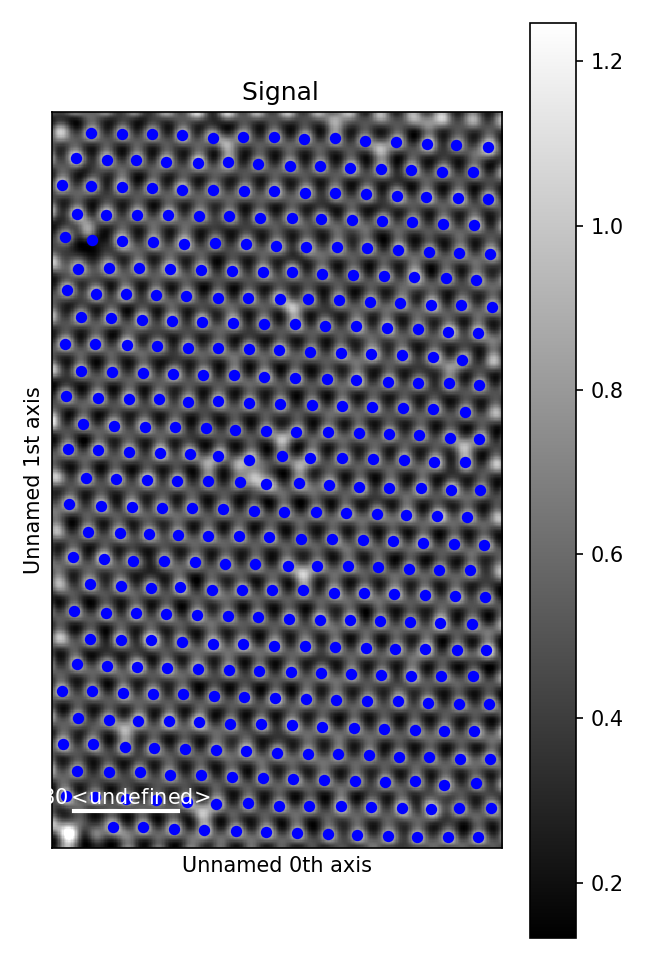

In [33]:
sub1.plot()

<IPython.core.display.Javascript object>


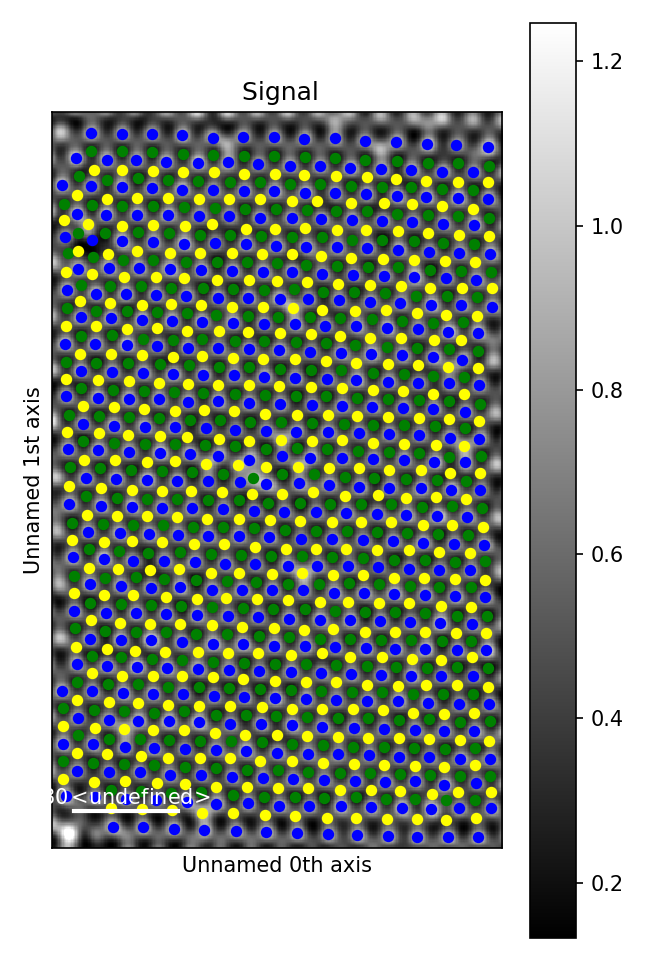

In [3]:
atom_lattice.plot()
plt.savefig('atom lattice initial.jpg')

## Create the Model Refiner object

In [4]:
refiner = Model_Refiner(sub_dict,
                        sampling=real_sampling * 10,
                        thickness=image_size_z_nm * 10,
                        name='Se Implanted MoS2')

## What is in the Model Refiner

In [5]:
refiner.get_element_count_as_dataframe()

H_0  Mo_0   Mo_1  Mo_1.S_1  Mo_1.Se_1  Mo_2  S_0  S_1  \
0 Initial State  351.0   0.0  375.0       9.0        0.0   0.0  0.0  8.0   

                   S_2  Se_1  Se_1.S_1  Se_2  
0 Initial State  331.0   7.0       8.0   0.0

<IPython.core.display.Javascript object>


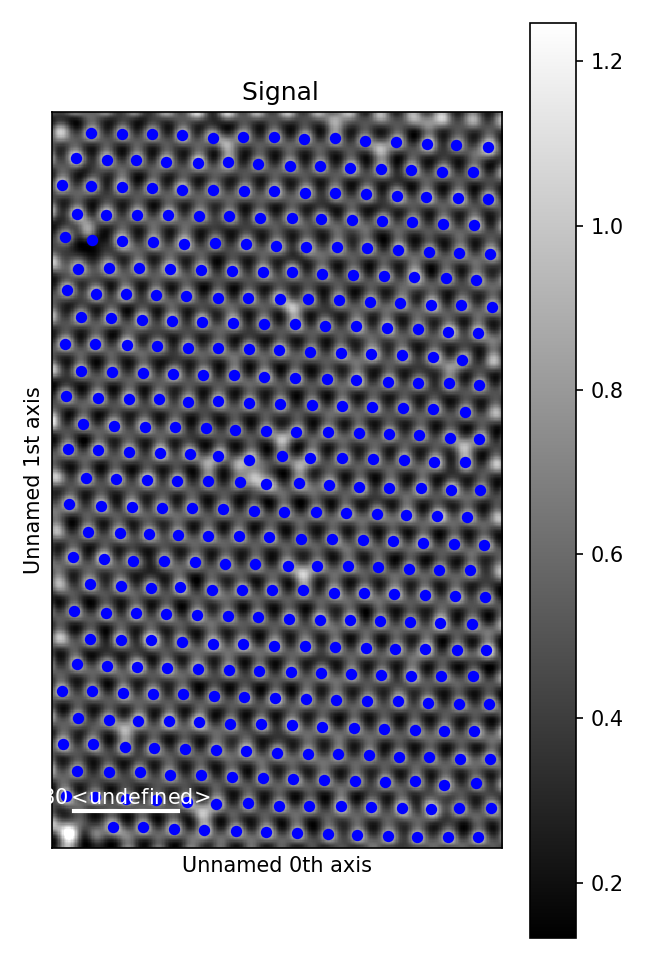

In [33]:
sub1.plot()

<IPython.core.display.Javascript object>


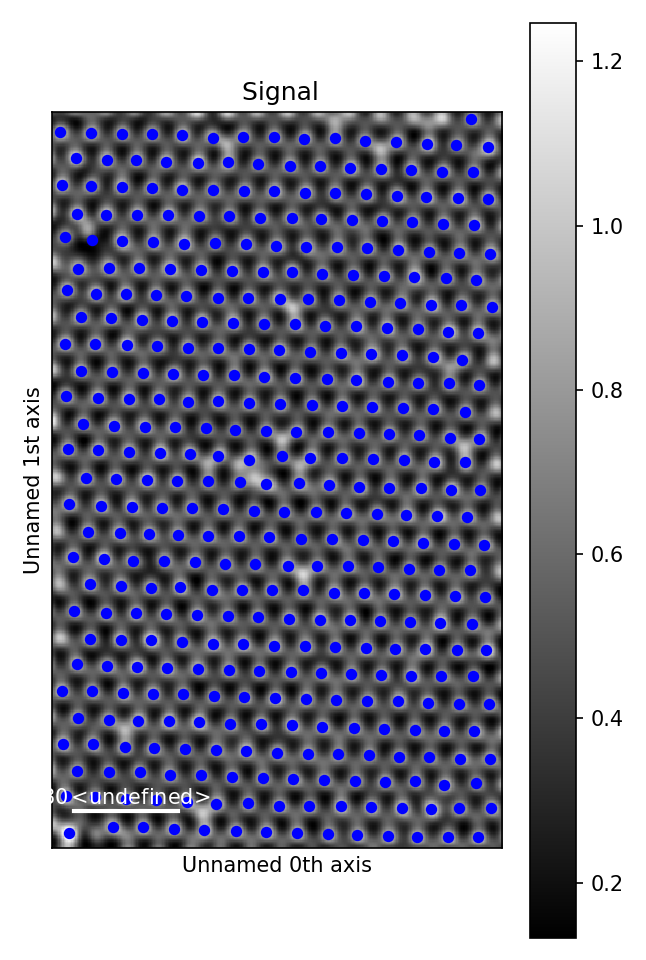

<IPython.core.display.Javascript object>


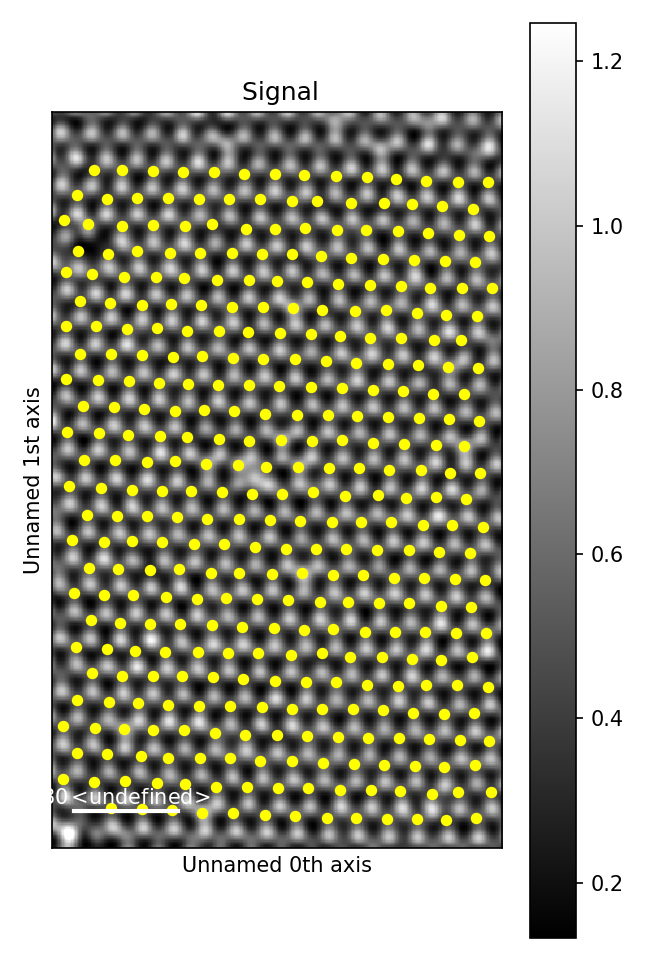

<IPython.core.display.Javascript object>


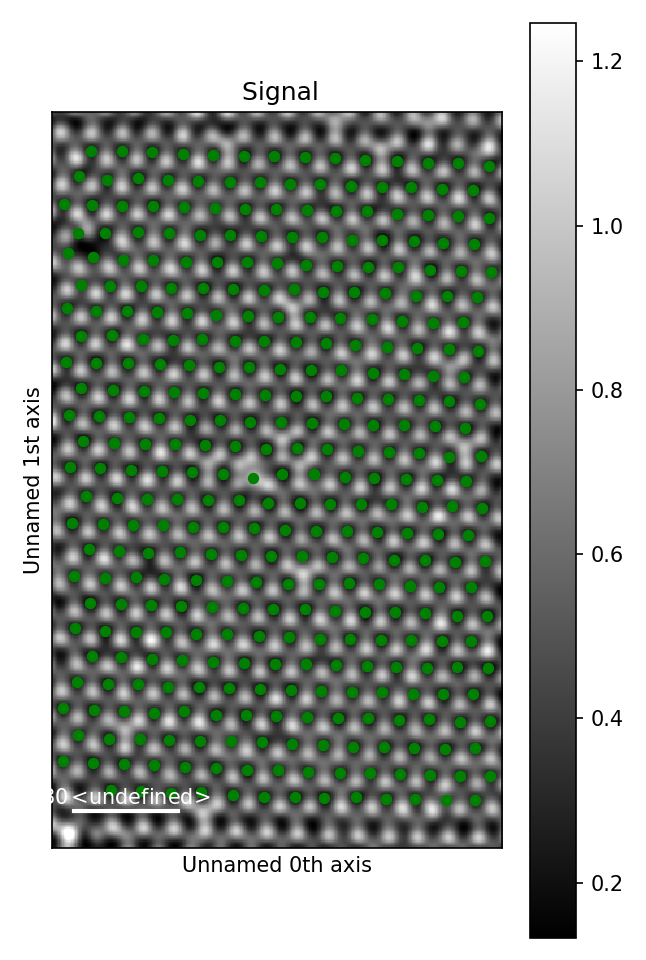

In [36]:
for sub in refiner.sublattice_list:
    sub.plot()

<IPython.core.display.Javascript object>


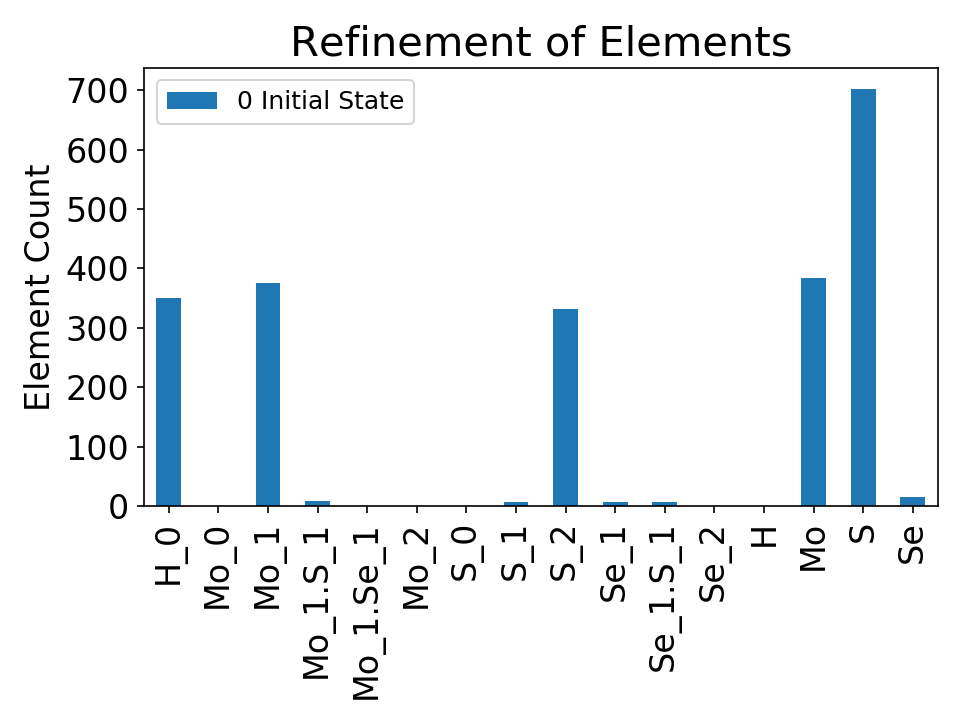

In [6]:
refiner.plot_element_count_as_bar_chart(2)


---------------
## Calibrate the Model Refiner

<IPython.core.display.Javascript object>


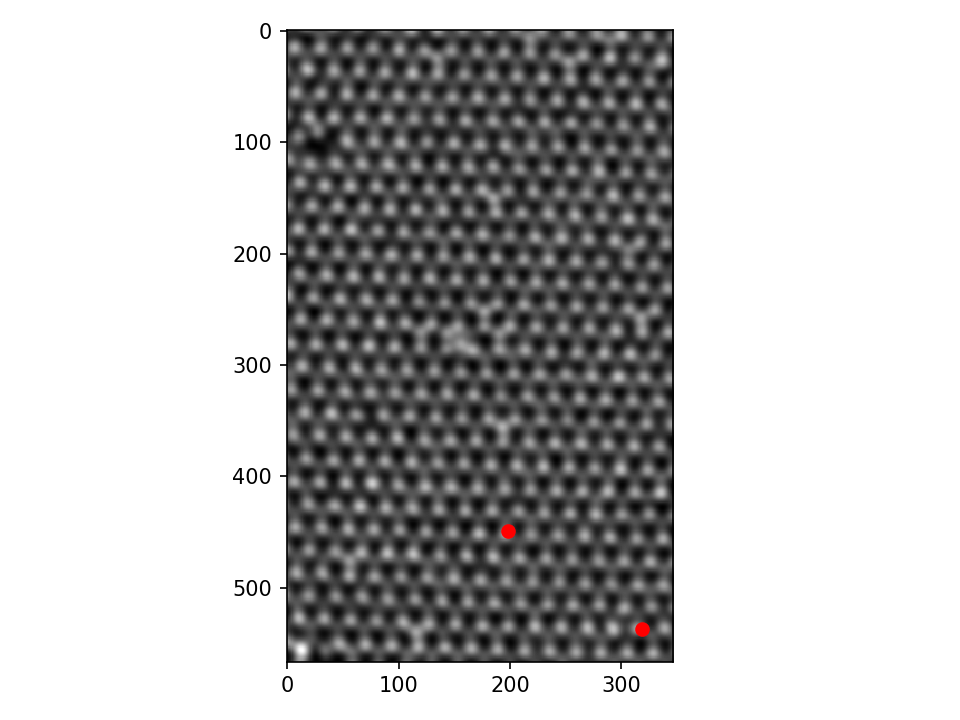

In [7]:
refiner.set_calibration_separation(11)
refiner.set_calibration_area()

<IPython.core.display.Javascript object>


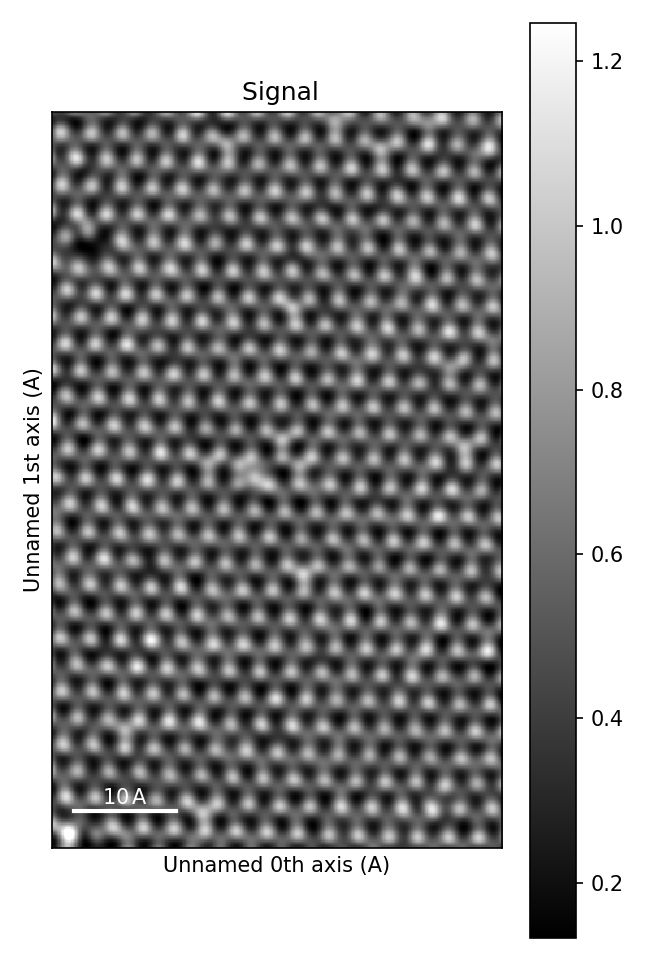

In [8]:
refiner.reference_image.plot()
cif_model = read('cif_filename.cif')
view(cif_model)

------------
## Simulate the Model Refiner

### Very fast simulation


In [8]:
from time import time
t0 = time()
refiner.create_simulation(sublattices='all',
                          filter_image=False,
                          calibrate_image=True,
                          filename='sim', probeStep=None,
                          interpolationFactor=100,
                          percent_to_nn=None,
                          mask_radius=2)
t1 = time() - t0
print("Time for simulation: {:.3f} s".format(t1))

c:\users\eocli\miniconda3\lib\site-packages\hyperspy\component.py:562: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('is_set', 'bool', 1)])


Time for simulation: 22.498 s


<IPython.core.display.Javascript object>


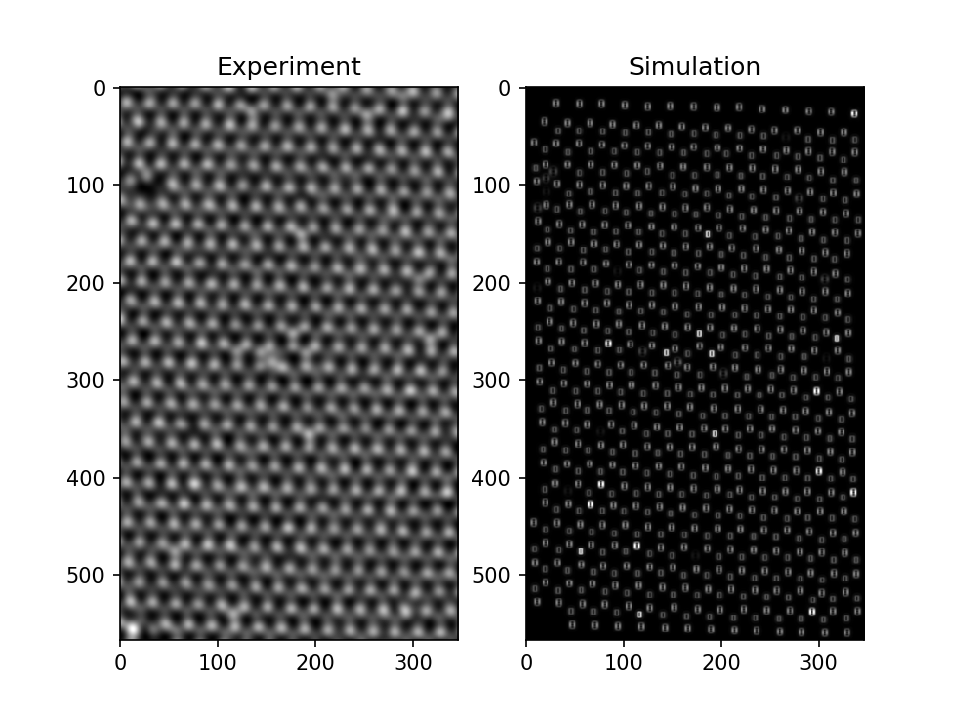

In [10]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')
plt.savefig('simulation1.jpg')

### More accurate simulation


In [11]:
t0 = time()
refiner.create_simulation(sublattices='all',
                          filter_image=False,
                          calibrate_image=True,
                          filename='', probeStep=None,
                          interpolationFactor=16,
                          percent_to_nn=None,
                          mask_radius=2)
t1 = time() - t0
print("Time for simulation: {:.3f} s".format(t1))

Time for simulation: 51.703 s


<IPython.core.display.Javascript object>


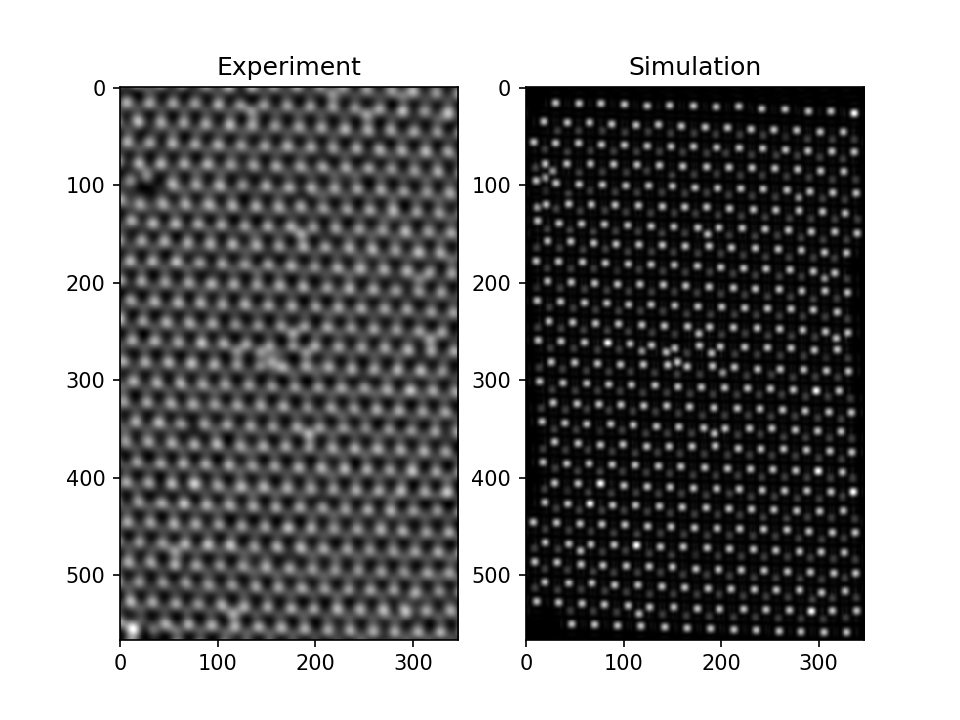

In [12]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')
plt.savefig('simulation2.jpg')

### Autofiltered simulation


In [13]:
t0 = time()
refiner.create_simulation(sublattices='all',
                          filter_image=True,
                          calibrate_image=True,
                          filename='', probeStep=None,
                          interpolationFactor=16,
                          percent_to_nn=None,
                          mask_radius=2)
t1 = time() - t0
print("Time for simulation: {:.3f} s".format(t1))

Time for simulation: 56.040 s


<IPython.core.display.Javascript object>


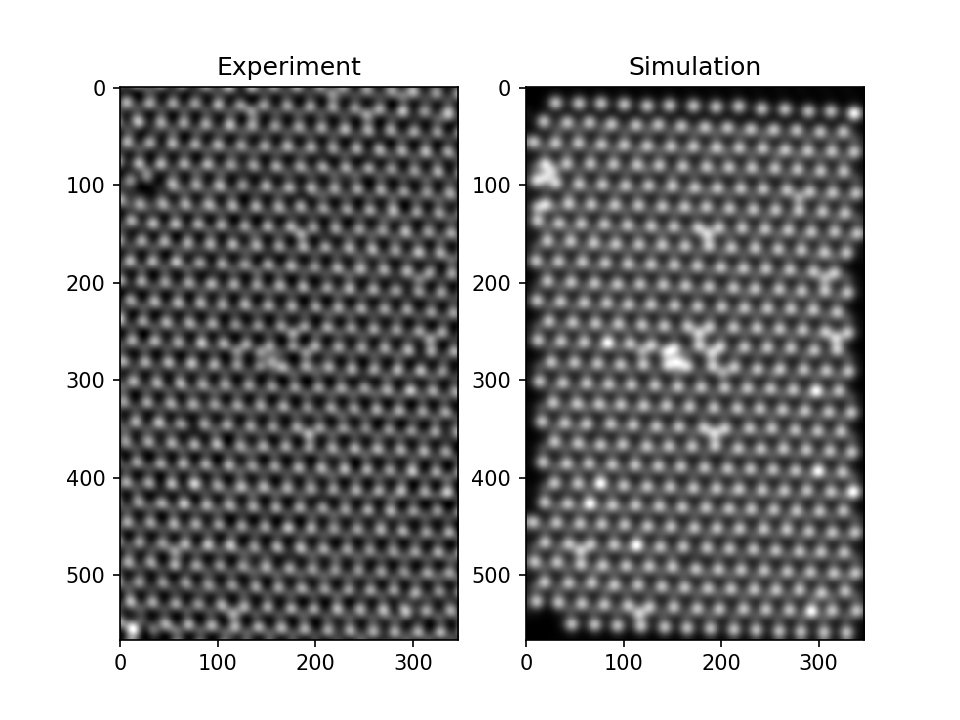

In [14]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')
plt.savefig('simulation3.jpg')

----------
# Refine the Atoms with Image Intensity

In [21]:
for i in range(2):
    refiner.image_difference_intensity_model_refiner()
    refiner.create_simulation(sublattices='all',
                          filter_image=True,
                          calibrate_image=True,
                          filename='', probeStep=None,
                          interpolationFactor=16,
                          percent_to_nn=None,
                          mask_radius=2)

# refiner.image_difference_intensity_model_refiner()

Changing some atoms
Changing some atoms
Changing some atoms
Changing some atoms
Changing some atoms
Changing some atoms


In [22]:
refiner.get_element_count_as_dataframe()

H_0  Mo_0   Mo_1  Mo_1.S_1  Mo_1.Se_1  Mo_2  S_0  S_1  \
0 Initial State  351.0   0.0  375.0       9.0        0.0   0.0  0.0  8.0   
1 Intensity      350.0   2.0  372.0       9.0        0.0   0.0  1.0  9.0   
2 Intensity      350.0   1.0  373.0       9.0        0.0   0.0  1.0  9.0   

                   S_2  Se_1  Se_1.S_1  Se_2  
0 Initial State  331.0   7.0       8.0   0.0  
1 Intensity      332.0   7.0       7.0   0.0  
2 Intensity      332.0   8.0       6.0   0.0

-----------------------------------------------
# Refine by finding new Atoms

In [35]:
refiner.image_difference_position_model_refiner(
    sublattices='all', pixel_threshold=20, num_peaks=10)
refiner.image_difference_intensity_model_refiner()

3 new atoms found! Adding new atom positions.
No New Atoms
No New Atoms
Changing some atoms


In [34]:
refiner.get_element_count_as_dataframe()

H_0  Mo_0   Mo_1  Mo_1.S_1  Mo_1.Se_1  Mo_2  S_0  S_1  \
0 Initial State  351.0   0.0  375.0       9.0        0.0   0.0  0.0  8.0   
1 Intensity      350.0   2.0  372.0       9.0        0.0   0.0  1.0  9.0   
2 Intensity      350.0   1.0  373.0       9.0        0.0   0.0  1.0  9.0   

                   S_2  Se_1  Se_1.S_1  Se_2  
0 Initial State  331.0   7.0       8.0   0.0  
1 Intensity      332.0   7.0       7.0   0.0  
2 Intensity      332.0   8.0       6.0   0.0

In [24]:
refiner.plot_element_count_as_bar_chart(2)
plt.savefig('final bar chart2.jpg')

-------------
# Revert to previous version

In [20]:
refiner.image_difference_intensity_model_refiner()
refiner.get_element_count_as_dataframe()

Changing some atoms


H_0  Mo_0   Mo_1  Mo_1.S_1  Mo_1.Se_1  Mo_2  S_0  S_1  \
0 Initial State  351.0   0.0  375.0       9.0        0.0   0.0  0.0  8.0   
1 Intensity      350.0   2.0  372.0       9.0        0.0   0.0  1.0  9.0   
2 Intensity      350.0   1.0  373.0       9.0        0.0   0.0  1.0  9.0   
3 Position       350.0   1.0  373.0       9.0        0.0   0.0  1.0  9.0   
4 Intensity      350.0   1.0  373.0      12.0        0.0   0.0  1.0  9.0   
5 Intensity      350.0   1.0  373.0       9.0        3.0   0.0  1.0  9.0   

                   S_2  Se_1  Se_1.S_1  Se_2       
0 Initial State  331.0   7.0       8.0   0.0  0.0  
1 Intensity      332.0   7.0       7.0   0.0  0.0  
2 Intensity      332.0   8.0       6.0   0.0  0.0  
3 Position       332.0   8.0       6.0   0.0  3.0  
4 Intensity      332.0   8.0       6.0   0.0  0.0  
5 Intensity      332.0   8.0       6.0   0.0  0.0

In [21]:
refiner = refiner.previous_refiner_instance

In [22]:
refiner.get_element_count_as_dataframe()

H_0  Mo_0   Mo_1  Mo_1.S_1  Mo_1.Se_1  Mo_2  S_0  S_1  \
0 Initial State  351.0   0.0  375.0       9.0        0.0   0.0  0.0  8.0   
1 Intensity      350.0   2.0  372.0       9.0        0.0   0.0  1.0  9.0   
2 Intensity      350.0   1.0  373.0       9.0        0.0   0.0  1.0  9.0   
3 Position       350.0   1.0  373.0       9.0        0.0   0.0  1.0  9.0   
4 Intensity      350.0   1.0  373.0      12.0        0.0   0.0  1.0  9.0   

                   S_2  Se_1  Se_1.S_1  Se_2       
0 Initial State  331.0   7.0       8.0   0.0  0.0  
1 Intensity      332.0   7.0       7.0   0.0  0.0  
2 Intensity      332.0   8.0       6.0   0.0  0.0  
3 Position       332.0   8.0       6.0   0.0  3.0  
4 Intensity      332.0   8.0       6.0   0.0  0.0

---------------------
# Accuracy of Simulation

<IPython.core.display.Javascript object>


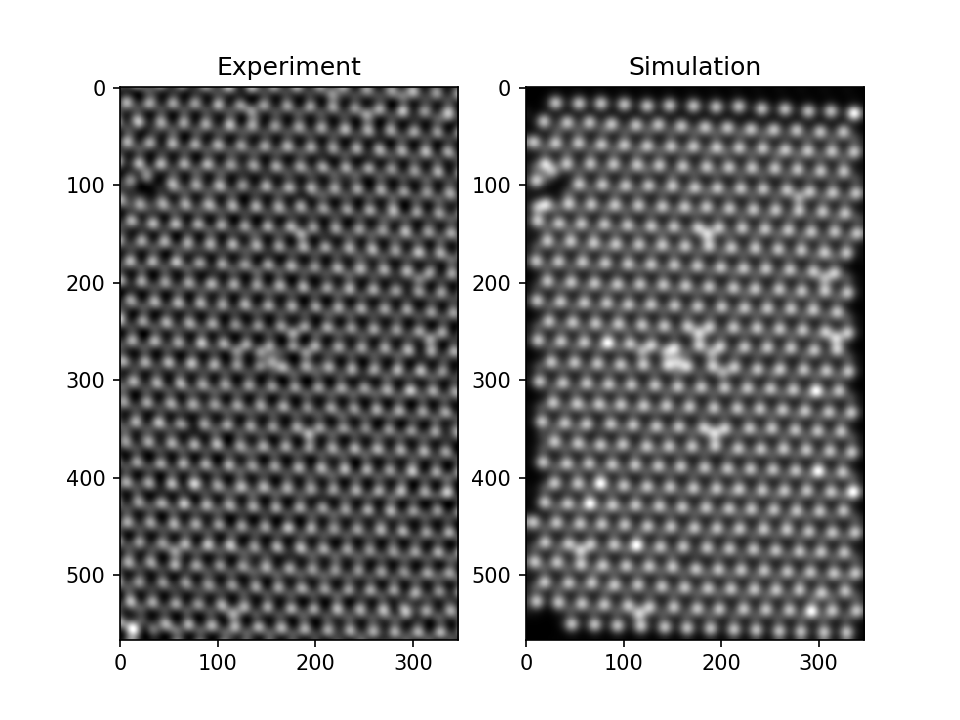

In [23]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')

<IPython.core.display.Javascript object>


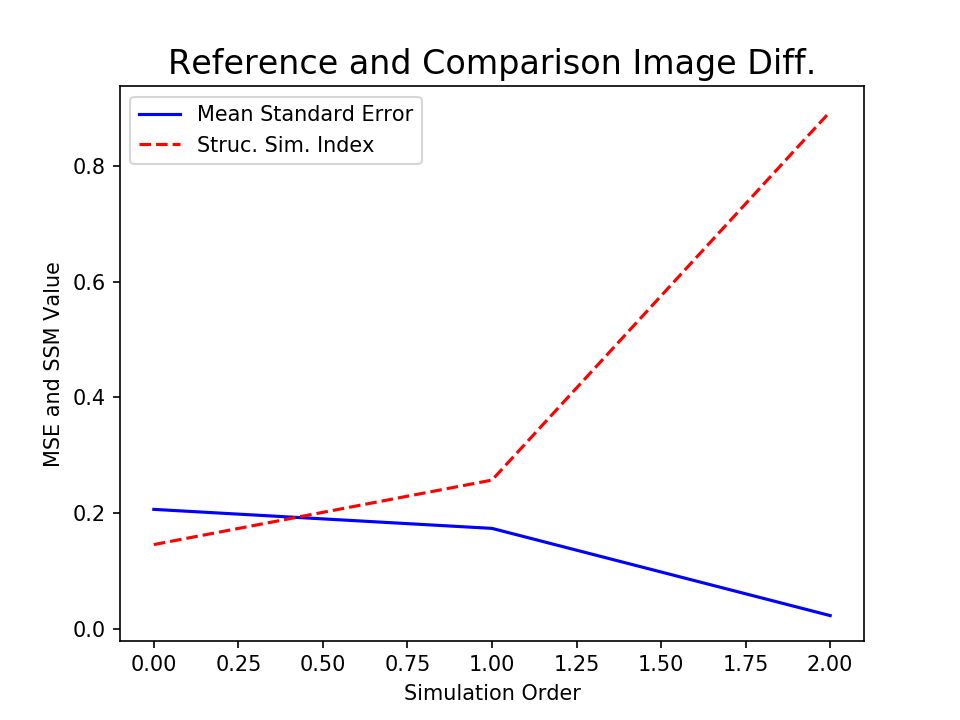

In [20]:
refiner.plot_error_between_comparison_and_reference_image()
plt.legend(loc=2)
# refiner.plot_error_between_comparison_and_reference_image(style='scatter')
plt.savefig('accuracy of sim.jpg')

In [26]:
from temul.model_creation import create_dataframe_for_cif
from temul.io import write_cif_from_dataframe

In [37]:
df = create_dataframe_for_cif(refiner.sublattice_list, refiner.flattened_element_list)

In [38]:
df

_atom_site_label  _atom_site_occupancy _atom_site_fract_x  \
0                  Mo                   1.0           0.944598   
1                  Mo                   1.0           0.878150   
2                  Mo                   1.0           0.809577   
3                  Mo                   1.0           0.745709   
4                  Mo                   1.0           0.677587   
5                  Mo                   1.0           0.612790   
6                  Mo                   1.0           0.542879   
7                  Mo                   1.0           0.474988   
8                  Mo                   1.0           0.407290   
9                  Mo                   1.0           0.337499   
10                 Mo                   1.0           0.269154   
11                 Mo                   1.0           0.201236   
12                 Mo                   1.0           0.133972   
13                 Mo                   1.0           0.841162   
14                  S                   1.0           0.841162   
15                 Mo                   1.0           0.974582   
16                 Mo                   1.0           0.902624   
17                 Mo                   1.0           0.775794   
18                 Mo                   1.0           0.707511   
19                 Mo                   1.0           0.570301   
20                 Mo                   1.0           0.640178   
21                 Mo                   1.0           0.504069   
22                 Mo                   1.0           0.363012   
23                 Mo                   1.0           0.434408   
24                 Mo                   1.0           0.299633   
25                 Mo                   1.0           0.230141   
26                 Mo                   1.0           0.163336   
27                 Mo                   1.0           0.094940   
28                 Mo                   1.0           0.029919   
29                 Mo                   1.0           0.870547   
...               ...                   ...                ...   
1060                S                   1.0           0.094458   
1061                S                   1.0           0.092679   
1062                S                   1.0           0.092679   
1063                S                   1.0           0.025773   
1064                S                   1.0           0.025773   
1065               Se                   1.0           0.030865   
1066                S                   1.0           0.029669   
1067                S                   1.0           0.029669   
1068                S                   1.0           0.030006   
1069                S                   1.0           0.033042   
1070                S                   1.0           0.033042   
1071                S                   1.0           0.036576   
1072                S                   1.0           0.036576   
1073                S                   1.0           0.042774   
1074                S                   1.0           0.042774   
1075                S                   1.0           0.047679   
1076                S                   1.0           0.047679   
1077                S                   1.0           0.052386   
1078                S                   1.0           0.052386   
1079                S                   1.0           0.055507   
1080                S                   1.0           0.055507   
1081                S                   1.0           0.054096   
1082                S                   1.0           0.054096   
1083                S                   1.0           0.022906   
1084                S                   1.0           0.022906   
1085                S                   1.0           0.023875   
1086                S                   1.0           0.023875   
1087               Se                   1.0           0.445339   
1088                S                   1.0  

In [40]:
write_cif_from_dataframe(df,
                             'final cif view-after pos',
                             'MoS2 with Se',
                             cell_length_a = refiner.image_xyz_sizes[0],
                             cell_length_b=refiner.image_xyz_sizes[1],
                             cell_length_c=refiner.image_xyz_sizes[2])

Writing block_1, <CifFile.CifFile.CifBlock object at 0x000001B4B52B49B0>
All blocks output.


In [41]:
final_cif = read('final cif view-after pos.cif')
view(final_cif)